In [1]:
import math
import numpy as np
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator, UnitarySimulator
from qiskit import IBMQ
import matplotlib
%matplotlib inline

In [35]:
from PIL import Image
originalImage= Image.open('Lena64.png')
(originalImageWidth, originalImageHeight) = originalImage.size
originalImagePixels = originalImage.load()

ssum = 0
for i in range(originalImageHeight):
    for j in range(originalImageWidth):
        ssum += originalImagePixels[i,j]**2

n = 12
originalState = np.zeros(2**n)
for i in range(originalImageHeight):
    for j in range(originalImageWidth):
        originalState[i*originalImageWidth + j] = originalImagePixels[i,j]/math.sqrt(ssum)

In [5]:
def loadQuantumImage(path):
    from PIL import Image
    image= Image.open(path)
    (width, height) = image.size
    pixels = image.load()

    ssum = 0
    for i in range(height):
        for j in range(width):
            ssum += pixels[i,j]**2

    m = math.floor(math.log(height, 2))
    n = math.floor(math.log(width, 2))
    stateVector = np.zeros(2**(m+n))
    for i in range(height):
        for j in range(width):
            stateVector[i*width + j] = pixels[i,j]/math.sqrt(ssum)
            
    return stateVector, height, width

In [3]:
def exportQuantumImage(counts, shots, height, width):
    from PIL import Image

    im= Image.new("L", (width, height))
    pixels = im.load()

    maxAmplitude = 256
    medAmplitude = maxAmplitude/2
    med = shots/(height * width)
    for key in counts:
        i = int(key[0:r], 2)
        j = int(key[r:], 2)
        val = round((((counts[key] - med)/med)*medAmplitude) + medAmplitude)
        pixels[i,j] = (val)
        
    return im

In [8]:
stateVector, height, width = loadQuantumImage('Lena32.png')
m = math.floor(math.log(height, 2))
n = math.floor(math.log(width, 2))

circ = QuantumCircuit(m+n, m+n)
indexes = range(m+n)

state = [complex(x) for x in stateVector]
circ.initialize(state, indexes)
circ.measure(indexes, indexes)

provider = IBMQ.get_provider(group='open')
backend = provider.get_backend('ibmq_16_melbourne')

shots = 2**(m+n)*10
result = execute(circ, backend, shots=shots).result()
counts = result.get_counts(circ)

exportedImg = exportQuantumImage(counts, shots, height, width)
exportedImg

JobError: 'Invalid job state. The job should be DONE but it is JobStatus.ERROR'

In [36]:
n = 12
circ = QuantumCircuit(n, n)
indexes = range(n)

#initialState = np.zeros(2**n)
#initialState[5976] = 1/2
#initialState[9976] = 1/2
#initialState[12976] = 1/2
#initialState[59886] = 1/2
state = [complex(x) for x in originalState]
circ.initialize(state, indexes)
circ.measure(indexes, indexes)

#circ.draw()

In [75]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ, decimals=3)

In [45]:
simulator = Aer.get_backend('qasm_simulator')
shots = 2**n*10
result = execute(circ, simulator, shots=shots).result()
counts = result.get_counts(circ)

KeyboardInterrupt: 

In [46]:
from qiskit import IBMQ
provider = IBMQ.get_provider(group='open')
provider.backends()
backend = provider.get_backend('ibmq_16_melbourne')

shots = 2**n*10
result = execute(circ, simulator, shots=shots).result()
counts = result.get_counts(circ)

height=64
width=64


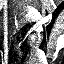

In [47]:
from PIL import Image

r = math.floor(n/2)
height = 2**r
width = 2**(n - r)
im= Image.new("L", (width, height))
pixels = im.load()

print(f'height={height}')
print(f'width={width}')

maxAmplitude = 256
medAmplitude = maxAmplitude/2
med = shots/2**n
for key in counts:
    i = int(key[0:r], 2)
    j = int(key[r:], 2)
    val = round((((counts[key] - med)/med)*medAmplitude) + medAmplitude)
    #print(f'i={i}')
    #print(f'j={j}')
    #print(f'val={val}')
    pixels[i,j] = (val)
    #print(pixels[i,j])
    #print(val)

#originalImage.show()
im